## Stock Market Prediction And Forecasting Using Stacked LSTM

CodeClause Internship

Task 1

Deepak Prajapat

In [1]:
import pandas as pd


In [2]:
# firstly we collect the stock data
df= pd.read_csv(r"https://raw.githubusercontent.com/mwitiderrick/stockprice/master/NSE-TATAGLOBAL.csv")

In [3]:
df.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55


In [4]:
df.describe

<bound method NDFrame.describe of             Date    Open    High     Low    Last   Close  \
0     2018-09-28  234.05  235.95  230.20  233.50  233.75   
1     2018-09-27  234.55  236.80  231.10  233.80  233.25   
2     2018-09-26  240.00  240.00  232.50  235.00  234.25   
3     2018-09-25  233.30  236.75  232.00  236.25  236.10   
4     2018-09-24  233.55  239.20  230.75  234.00  233.30   
...          ...     ...     ...     ...     ...     ...   
2030  2010-07-27  117.60  119.50  112.00  118.80  118.65   
2031  2010-07-26  120.10  121.00  117.10  117.10  117.60   
2032  2010-07-23  121.80  121.95  120.25  120.35  120.65   
2033  2010-07-22  120.30  122.00  120.25  120.75  120.90   
2034  2010-07-21  122.10  123.00  121.05  121.10  121.55   

      Total Trade Quantity  Turnover (Lacs)  
0                  3069914          7162.35  
1                  5082859         11859.95  
2                  2240909          5248.60  
3                  2349368          5503.90  
4              

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2035 entries, 0 to 2034
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Date                  2035 non-null   object 
 1   Open                  2035 non-null   float64
 2   High                  2035 non-null   float64
 3   Low                   2035 non-null   float64
 4   Last                  2035 non-null   float64
 5   Close                 2035 non-null   float64
 6   Total Trade Quantity  2035 non-null   int64  
 7   Turnover (Lacs)       2035 non-null   float64
dtypes: float64(6), int64(1), object(1)
memory usage: 127.3+ KB


In [6]:
df.shape

(2035, 8)

In [7]:
df1=df.reset_index()['Close']

In [8]:
import matplotlib.pyplot as plt

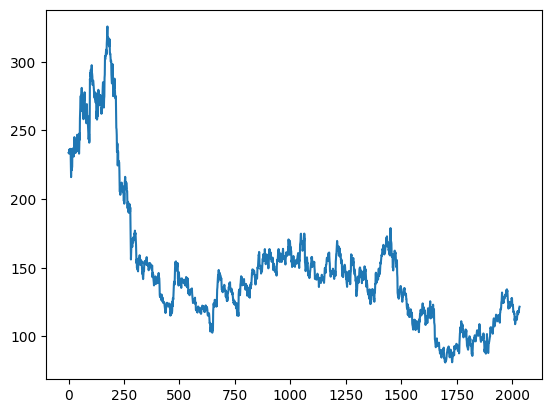

In [9]:
plt.plot(df1)

In [10]:
### lSTM is unable to scaling of the data, so we aply MinMaxscaler

In [11]:
import numpy as np


In [12]:
from sklearn.preprocessing import MinMaxScaler
Scaler = MinMaxScaler(feature_range = (0,1))
df1=Scaler.fit_transform(np.array(df1).reshape(-1,1))

In [13]:
df1

array([[0.62418301],
       [0.62214052],
       [0.62622549],
       ...,
       [0.1621732 ],
       [0.16319444],
       [0.16584967]])

In [14]:
df1.shape

(2035, 1)

In [15]:
training_size=int(len(df1)*0.65)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [16]:
training_size,test_size

(1322, 713)

In [17]:
len(train_data),len(test_data)

(1322, 713)

# Convert an array of values into a data matrix

In [18]:
def create_dataset(dataset, time_step=1):
    dataX, dataY = [],[]
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step),0]
        dataX.append(a)
        dataY.append(dataset[i + time_step,0])
        return np.array(dataX), np.array(dataY)

In [19]:
# Reshape X=t,t+1,t+2,t+3, and Y=t+4

time_step = 100
X_train, y_train = create_dataset(train_data,time_step)
X_test , y_test = create_dataset(test_data, time_step)

In [20]:
print(X_train)

[[0.62418301 0.62214052 0.62622549 0.63378268 0.62234477 0.62765523
  0.62888072 0.62949346 0.63582516 0.625      0.57883987 0.55167484
  0.57618464 0.58006536 0.57230392 0.57781863 0.58312908 0.63623366
  0.62642974 0.63337418 0.62745098 0.62254902 0.6376634  0.61294935
  0.63112745 0.65196078 0.67075163 0.66196895 0.64705882 0.63970588
  0.62745098 0.62336601 0.63868464 0.63480392 0.63991013 0.64767157
  0.62785948 0.63112745 0.63194444 0.67790033 0.65870098 0.65890523
  0.64603758 0.63705065 0.67544935 0.66319444 0.6439951  0.62152778
  0.64419935 0.68198529 0.6629902  0.72691993 0.75265523 0.77144608
  0.79166667 0.79370915 0.75714869 0.77736928 0.80208333 0.81719771
  0.7495915  0.76960784 0.74754902 0.75428922 0.76143791 0.74979575
  0.73999183 0.72406046 0.73488562 0.76021242 0.79411765 0.78104575
  0.80412582 0.77062908 0.76245915 0.74652778 0.75980392 0.76041667
  0.75490196 0.74673203 0.7120098  0.74468954 0.7689951  0.74979575
  0.72120098 0.73406863 0.72263072 0.70894608 0.

In [21]:
print(X_train.shape),print(y_train.shape)

(1, 100)
(1,)


(None, None)

# Reshape input to be ( sample, time steps , feature ) for LSTM


In [22]:
X_train = X_train.reshape(X_train.shape[0],X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1], 1)

In [23]:
# Create the Stacked LSTM model

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [24]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

In [25]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [26]:
model.fit(X_train, y_train, validation_data= (X_test,y_test),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
1/1 [==============================] - 6s 6s/step - loss: 0.5910 - val_loss: 0.0400
Epoch 2/100
1/1 [==============================] - 0s 112ms/step - loss: 0.3793 - val_loss: 0.0112
Epoch 3/100
1/1 [==============================] - 0s 116ms/step - loss: 0.1839 - val_loss: 2.5736e-04
Epoch 4/100
1/1 [==============================] - 0s 113ms/step - loss: 0.0348 - val_loss: 0.0308
Epoch 5/100
1/1 [==============================] - 0s 114ms/step - loss: 0.0141 - val_loss: 0.0899
Epoch 6/100
1/1 [==============================] - 0s 111ms/step - loss: 0.1048 - val_loss: 0.0952
Epoch 7/100
1/1 [==============================] - 0s 115ms/step - loss: 0.0966 - val_loss: 0.0676
Epoch 8/100
1/1 [==============================] - 0s 113ms/step - loss: 0.0428 - val_loss: 0.0385
Epoch 9/100
1/1 [==============================] - 0s 113ms/step - loss: 0.0067 - val_loss: 0.0193
Epoch 10/100
1/1 [==============================] - 0s 113ms/step - loss: 8.7657e-04 - val_loss: 0.0093
Epoc

In [27]:
import tensorflow as tf

In [28]:
# Do the prediction and check performance matrics

train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

1/1 [==============================] - 0s 34ms/step


In [29]:
train_predict=Scaler.inverse_transform(train_predict)
test_predict=Scaler.inverse_transform(test_predict)


In [30]:
# Calculate RMSE performance metrics 

import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train, train_predict))

292.8557789123136

In [31]:
# Test Data RMSE

math.sqrt(mean_squared_error(y_test, test_predict))

216.82848692251966

In [ ]:
# Overall, this code is used to visualize the performance of a time series prediction model 
# by plotting the original data, with its training and testing predictions.

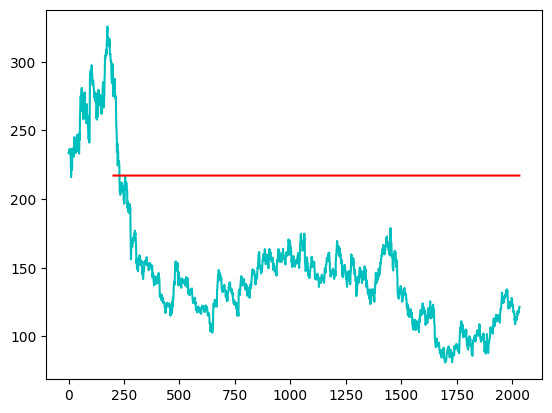

In [32]:
# Train prediction for plotting

look_back=100
trainPredictionPlot= np.empty_like(df1)
trainPredictionPlot[:, :] = np.nan
trainPredictionPlot[look_back:len(train_predict)+look_back, :] = train_predict
# test prediction for plotting

testPredictionPlot = np.empty_like(df1)
testPredictionPlot[:, :] = np.nan
trainPredictionPlot[len(train_predict)+(look_back*2)+1 :len(df1)-1, :] = test_predict
# plot baseline and predictions

plt.plot(Scaler.inverse_transform(df1),color="c")
plt.plot(trainPredictionPlot, color="r")
plt.plot(testPredictionPlot)
plt.show()


In [33]:
len(test_data)

713

In [34]:
x_input=test_data[341:].reshape(1,-1)
x_input.shape

(1, 372)

In [35]:
x_input= test_data[341:].reshape(1,-1)

In [36]:
x_input.shape

(1, 372)

In [37]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()
temp_input

[0.048815359477124176,
 0.048815359477124176,
 0.05310457516339867,
 0.049632352941176405,
 0.05065359477124176,
 0.05126633986928103,
 0.049632352941176405,
 0.05902777777777779,
 0.055555555555555525,
 0.040849673202614345,
 0.037377450980392135,
 0.037377450980392135,
 0.026552287581699308,
 0.02879901960784309,
 0.03165849673202614,
 0.03165849673202614,
 0.036356209150326724,
 0.022058823529411742,
 0.016748366013071836,
 0.014501633986928053,
 0.022263071895424813,
 0.03615196078431371,
 0.02675653594771238,
 0.03206699346405223,
 0.02696078431372545,
 0.035743464052287566,
 0.03594771241830064,
 0.0404411764705882,
 0.039215686274509776,
 0.044117647058823484,
 0.029820261437908446,
 0.012254901960784326,
 0.012867647058823484,
 0.011437908496731986,
 0.0024509803921567985,
 0.005923202614379064,
 0.0,
 0.007148692810457491,
 0.0042892156862744946,
 0.006740196078431349,
 0.006331699346405206,
 0.011233660130718914,
 0.019607843137254888,
 0.02757352941176472,
 0.030024509803921

In [39]:
# Prediction the next 30 days using a trained machine learning model.

from numpy import array

lst_output=[]
i=0
n_steps=30
while(i<30):
    
    if(len(temp_input)>=n_steps):
        #print(temp_input)
        x_input=np.array(temp_input[-n_steps:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        # print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day input {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        # print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = np.array(temp_input)
        x_input = x_input.reshape((1, len(temp_input), 1))
        yhat = model.predict(x_input, verbose=0)
        print("{} day input {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        # print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
        
print(lst_output)



0 day input [0.16156046 0.14971405 0.1503268  0.15196078 0.14726307 0.14501634
 0.14603758 0.12479575 0.13112745 0.11397059 0.1190768  0.12377451
 0.13562092 0.12908497 0.13459967 0.12806373 0.13031046 0.12724673
 0.13521242 0.14522059 0.15257353 0.14848856 0.14338235 0.14562908
 0.15236928 0.15400327 0.14971405 0.1621732  0.16319444 0.16584967]
0 day input [[0.37917832]]
1 day input [0.14971405 0.1503268  0.15196078 0.14726307 0.14501634 0.14603758
 0.12479575 0.13112745 0.11397059 0.1190768  0.12377451 0.13562092
 0.12908497 0.13459967 0.12806373 0.13031046 0.12724673 0.13521242
 0.14522059 0.15257353 0.14848856 0.14338235 0.14562908 0.15236928
 0.15400327 0.14971405 0.1621732  0.16319444 0.16584967 0.37917832]
1 day input [[0.38129038]]
2 day input [0.1503268  0.15196078 0.14726307 0.14501634 0.14603758 0.12479575
 0.13112745 0.11397059 0.1190768  0.12377451 0.13562092 0.12908497
 0.13459967 0.12806373 0.13031046 0.12724673 0.13521242 0.14522059
 0.15257353 0.14848856 0.14338235 0.1

23 day input [[0.6719601]]
24 day input [0.15236928 0.15400327 0.14971405 0.1621732  0.16319444 0.16584967
 0.37917832 0.38129038 0.3853392  0.39138249 0.39937606 0.40921178
 0.42061049 0.43326458 0.44713363 0.461669   0.47690207 0.49241403
 0.50807381 0.52370566 0.5394066  0.55498201 0.57049108 0.58580089
 0.60092592 0.61574048 0.63021827 0.64437556 0.65829468 0.67196012]
24 day input [[0.6852958]]
25 day input [0.15400327 0.14971405 0.1621732  0.16319444 0.16584967 0.37917832
 0.38129038 0.3853392  0.39138249 0.39937606 0.40921178 0.42061049
 0.43326458 0.44713363 0.461669   0.47690207 0.49241403 0.50807381
 0.52370566 0.5394066  0.55498201 0.57049108 0.58580089 0.60092592
 0.61574048 0.63021827 0.64437556 0.65829468 0.67196012 0.68529582]
25 day input [[0.6982613]]
26 day input [0.14971405 0.1621732  0.16319444 0.16584967 0.37917832 0.38129038
 0.3853392  0.39138249 0.39937606 0.40921178 0.42061049 0.43326458
 0.44713363 0.461669   0.47690207 0.49241403 0.50807381 0.52370566
 0.5394

In [40]:
 day_new=np.arange(1,101)
 day_predict =np.arange(101,131)

    

In [41]:
len(df1)

2035

In [42]:
df3=df1.tolist()
df3.extend(lst_output)

In [ ]:
#  plot two lines: one representing the historical stock prices for a particular company, 
#  and another representing the predicted stock prices for the next 30 days.

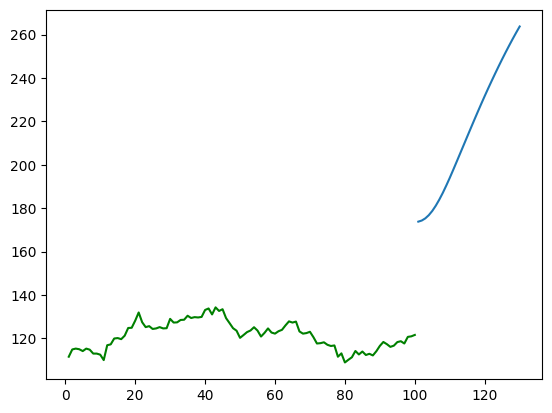

In [43]:
plt.plot(day_new,Scaler.inverse_transform(df1[1935:]),color="g")
plt.plot(day_predict,Scaler.inverse_transform(lst_output))

In [ ]:
# The resulting plot shows the historical and predicted stock prices for the company over time. 
# The red line represents the combined historical and predicted prices

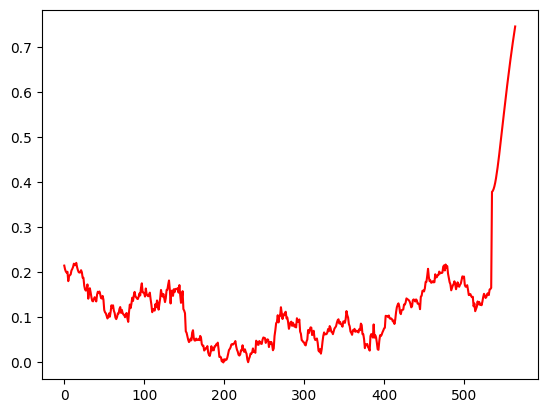

In [51]:
df3=df1.tolist()
df3.extend(lst_output)
plt.plot(df3[1500:],color="r")

In [45]:
df3=Scaler.inverse_transform(df3).tolist()

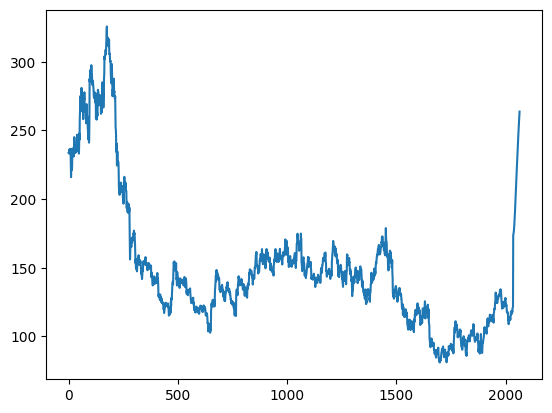

In [46]:
plt.plot(df3)

# Project (Task 1)
 Submitted by 
 Deepak prajapat